In [1]:
# loading the required libraries 
#Load required libraries
import os
import csv
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
import string
punctuations = string.punctuation
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# set the working directory
os.chdir('C:/Users/admin/Documents/Python Files')
os.getcwd()

'C:\\Users\\admin\\Documents\\Python Files'

In [3]:
## Connect Twitter

#Store required keys
consumer_key = "9geIDwOzVdbm0dCuAiUpzCUnu"
consumer_secret = "TzkfViMc6bDdK2FILQ8xTVCG82qjn0FhUdvsJGzlQ79J0EG3SR"
access_key = "1541025487-DeXUlBh0Oo76u5NWW4j7iPejrTlRbw3A3Q2zMU0"
access_secret = "J0H68P6Zgmx7tcQfEL0qjDVgsTXsPTGeRml04cbk233jp"

In [4]:
#Establish connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

##### 	We have extracted tweets by below trending Hastags
1. 	#BTSWORLD
2. 	#PAKvNZ
3. 	#GOT7onTodayShow
4.  #StepDownCM
5. 	#AjazKhan
6.  #JSWPlatinaLaunch
7. 	#ZeroTrustGovt
8. 	#TheLionKingWithKingKhan
9.  #PrayForKyoani
10. #SecretOfHappyLife
11.	#FridayFeeling
12. #TopGunMaverick
13. #MangalPandey
14. #ICCHallOfFame
15. Cats
16. #SaturdayMotivation
17. #TheeMugamDhaan
18. #PriyankaTakesCharge
19. #Justus2
20. #WorldsToughestPanga
21. #SonbhadraMassacre
22. #3rdSingle
23. #LuvRanjan
24. #notmydeepika
25. #AnandibenPatel

#### Let's extract the tweets based on above hastags
- we have used 2 hastags at a time to retrive data
- Note: we have already extracted the data and uploaded on github repository so you can use that

In [ ]:
#Extract tweets
#Create empty list
results = []
trending_hastags = ['#notmydeepika','#AnandibenPatel']
for i in trending_hastags:
    #Get the first 500 items based on the search query
    for tweet in tweepy.Cursor(api.search,q=i,lang="en").items(600):
        results.append(tweet)

In [ ]:
# Verify the number of items returned
print(len(results))

In [ ]:
#Convert list into dataframe
def toDataFrame(tweets):
    #Create empty data frame
    DataSet = pd.DataFrame()
    
    #extract relevant information
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]

    return DataSet

In [300]:
#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [301]:
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,1152502410927050752,SAY NO TO LUV RANJAN\nSAY NO TO LUV RANJAN\nSA...,0,0,Twitter for Android,2019-07-20 08:56:01,1141732385551110144,HarshMCU,Harsh The Strongest Avenger,2019-06-20 15:39:47,Living With Avengers,96,389,"Mumbai, India",None
1,1152502345999273986,SAY NO TO LUV RANJAN\nSAY NO TO LUV RANJAN\nSA...,0,0,Twitter for iPhone,2019-07-20 08:55:46,312046139,aamirspk2,Syed,2011-06-06 14:03:46,"Fan Account, team jacian",1929,418,"Hyderabad, India",None
2,1152502280341446659,What happened 🙄 why’s this hashtag trending 🥶 ...,0,0,Twitter for iPhone,2019-07-20 08:55:30,1128182318013665280,ImRish45,RISHITA!,2019-05-14 06:16:40,CRICKET || RohitSharma ❤️ || TENNIS || MariaSh...,65,34,India,None
3,1152502272137584640,RT @BannoReBanno: Everyone use #notmydeepika i...,18,0,Twitter for iPhone,2019-07-20 08:55:28,3255960285,ChoChoGome0,CHO🌸,2015-05-15 10:04:38,"Good to people , Bitch to myself 🌈🌈",240,445,Snapchat👻👻 : Chochogome17,None
4,1152502246971543553,RT @ZeeNews: Here's why #notmydeepika is trend...,15,0,Twitter for Android,2019-07-20 08:55:22,1245809442,10Liya,~SOON~,2013-03-06 10:57:23,on the way.....,248,90,Singapore,None


In [302]:
DataSet.to_csv('tweeterDataset11.csv')

#### Let's load all the tweeter dataset we extracted

In [3]:
#Load twitter data
a = pd.read_csv("tweeterDataset.csv")
b = pd.read_csv("tweeterDataset1.csv")
c = pd.read_csv("tweeterDataset2.csv")
d = pd.read_csv("tweeterDataset3.csv")
e = pd.read_csv("tweeterDataset4.csv")
f = pd.read_csv("tweeterDataset5.csv")
g = pd.read_csv("tweeterDataset6.csv")
h = pd.read_csv("tweeterDataset7.csv")
i = pd.read_csv("tweeterDataset8.csv")
j = pd.read_csv("tweeterDataset9.csv")
k = pd.read_csv("tweeterDataset10.csv")
l = pd.read_csv("tweeterDataset11.csv")

In [4]:
dataset = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l],ignore_index=True)

In [5]:
dataset.head(5)

,Unnamed: 0,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,0,1143919690743341056,RT @softwhoseok: me explaining to namjoon and ...,169,0,Twitter for Android,2019-06-26 16:31:21,192224155,owenthesaintss,✨ hope right here✨,2010-09-18 14:48:44,FUCK your zodiac sign what’s your name what ex...,547,421,NaN,NaN
1,1,1143919690718334976,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,Twitter for Android,2019-06-26 16:31:21,1141749496755499011,reveluv_exe,Gabi$ 🤡 #ATEEZ2ndWin ಥ‿ಥ,2019-06-20 16:47:47,to__##JIMINIE : I will be your manager on bts ...,20,55,was created 20/06/19,NaN
2,2,1143919690407956483,RT @guroderes: i drew my personal interpretati...,3785,0,Twitter for iPhone,2019-06-26 16:31:21,3234322494,whozhaechann,ThaYsPetAcuLaR Viu o jk voando 25/05,2015-06-02 23:45:29,If teardrops could be bottled? 🥀{fã account} @...,7169,7142,"Rio de Janeiro, Brasil",NaN
3,3,1143919689786990594,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,Twitter Web App,2019-06-26 16:31:21,1127776211214655489,chilachiara,Chila,2019-05-13 03:22:56,I dont care,4,17,NaN,NaN
4,4,1143919689619398656,RT @sugasaward: Me chasing seokjin to audition...,1217,0,Twitter Web App,2019-06-26 16:31:21,1113918609275990016,LeilaXBangtan,Leila🔥,2019-04-04 21:37:46,NaN,716,4442,NaN,NaN


In [6]:
dataset.shape

(11610, 16)

In [7]:
df = dataset.copy()

In [8]:
df.columns

Index(['Unnamed: 0', 'tweetID', 'tweetText', 'tweetRetweetCt',
       'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'userID',
       'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userFollowerCt',
       'userFriendsCt', 'userLocation', 'userTimezone'],
      dtype='object')

In [9]:
# let's remove the features which are not required 
df = df.drop(['Unnamed: 0', 'tweetID', 'tweetSource', 'tweetCreated', 'userID',
       'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userLocation', 'userTimezone','userFollowerCt',
       'userFriendsCt'],axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11610 entries, 0 to 11609
Data columns (total 3 columns):
tweetText          11610 non-null object
tweetRetweetCt     11610 non-null int64
tweetFavoriteCt    11610 non-null int64
dtypes: int64(2), object(1)
memory usage: 272.2+ KB


In [11]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt
count,11610.000000,11610.000000
mean,652.066925,0.617743
std,2801.868120,7.275852
min,0.000000,0.000000
25%,0.000000,0.000000
50%,16.000000,0.000000
75%,246.000000,0.000000
max,118799.000000,478.000000


###### let' feature engineer features like : 
- Length of tweet (1 to 140 characters) 
- Average word length in tweet 
- Number of #hashtags 
- Number of @mentions 
- Number of links  

In [12]:
def length_of_tweet(tweet):
    return len(tweet)

In [13]:
def avg_len(length):
    return length/sum(df['length_of_tweet'])

In [14]:
def num_hastags(tweet):
    count = 0
    words = tweet.split()
    for word in words:
        if word[:1] == '#' and len(word)>1:
            count+=1
    return count

In [15]:
def num_mentions(tweet):
    words = tweet.split()
    count = 0
    for word in words:
        if word[:1] == '@' and len(word)>1:
            count+=1
    return count

In [16]:
def num_links(tweet):
    words = tweet.split()
    count = 0
    for word in words:
        if word[:5] == 'https' and len(word)>5:
            count+=1
    return count

In [17]:
df['num_links'] = df['tweetText'].apply(num_links)
df['num_mentions'] = df['tweetText'].apply(num_mentions)
df['num_hastags'] = df['tweetText'].apply(num_hastags)
df['length_of_tweet'] = df['tweetText'].apply(length_of_tweet)

In [18]:
df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet
0,RT @softwhoseok: me explaining to namjoon and ...,169,0,1,1,1,140
1,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,0,1,1,140
2,RT @guroderes: i drew my personal interpretati...,3785,0,1,1,2,121
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,0,1,2,140
4,RT @sugasaward: Me chasing seokjin to audition...,1217,0,1,1,1,93


In [19]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet
count,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,652.066925,0.617743,0.437898,1.046167,1.143928,125.316365
std,2801.868120,7.275852,0.528597,0.886303,1.362863,26.233256
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,118.000000
50%,16.000000,0.000000,0.000000,1.000000,1.000000,140.000000
75%,246.000000,0.000000,1.000000,1.000000,1.000000,140.000000
max,118799.000000,478.000000,3.000000,12.000000,13.000000,151.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11610 entries, 0 to 11609
Data columns (total 7 columns):
tweetText          11610 non-null object
tweetRetweetCt     11610 non-null int64
tweetFavoriteCt    11610 non-null int64
num_links          11610 non-null int64
num_mentions       11610 non-null int64
num_hastags        11610 non-null int64
length_of_tweet    11610 non-null int64
dtypes: int64(6), object(1)
memory usage: 635.0+ KB


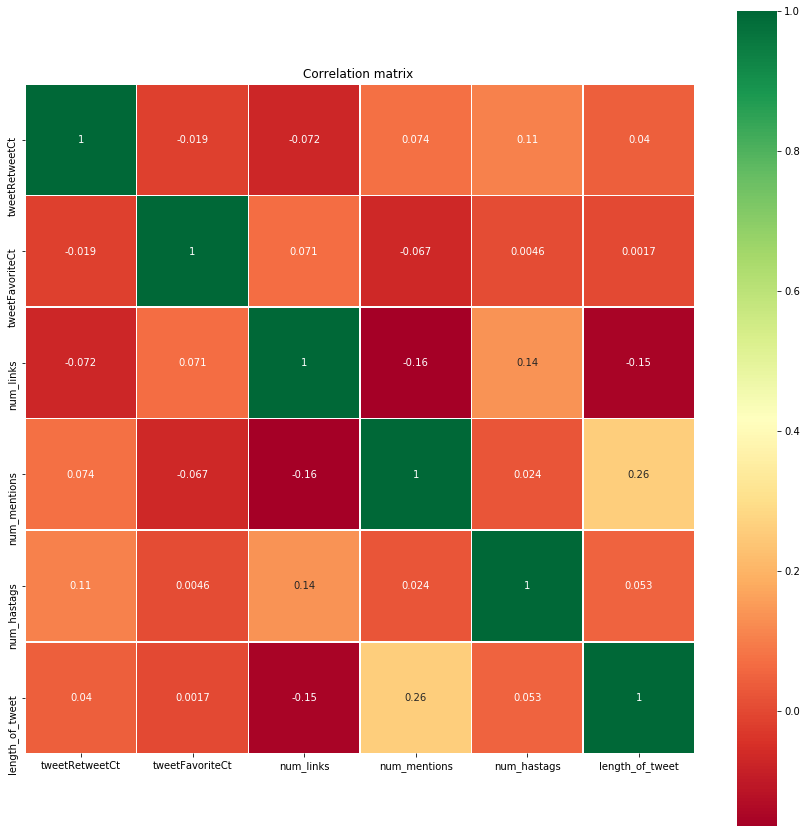

In [22]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['tweetRetweetCt','tweetFavoriteCt','num_links','num_mentions','num_hastags','length_of_tweet']].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

#### Using  below attribute/features to create score column:
1. 'tweetRetweetCt'
2. 'tweetFavoriteCt'
3. 'num_links'
4. 'num_mentions' 
5. 'num_hastags'
6. 'length_of_tweet'

In [25]:
df['score'] = df['tweetRetweetCt']+df['tweetFavoriteCt']+df['num_links']+df['num_mentions']+df['num_hastags']+df['length_of_tweet']

In [26]:
# Normalizing score values in range 0 to 100
df['score'] = (df['score'] - min(df['score']))/(max(df['score']) - min(df['score']))*100

In [27]:
df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet,score
0,RT @softwhoseok: me explaining to namjoon and ...,169,0,1,1,1,140,0.258948
1,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,0,1,1,140,0.443069
2,RT @guroderes: i drew my personal interpretati...,3785,0,1,1,2,121,3.283926
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,0,1,2,140,0.337977
4,RT @sugasaward: Me chasing seokjin to audition...,1217,0,1,1,1,93,1.100527


In [28]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet,score
count,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,652.066925,0.617743,0.437898,1.046167,1.143928,125.316365,0.652942
std,2801.868120,7.275852,0.528597,0.886303,1.362863,26.233256,2.356673
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,118.000000,0.115181
50%,16.000000,0.000000,0.000000,1.000000,1.000000,140.000000,0.127792
75%,246.000000,0.000000,1.000000,1.000000,1.000000,140.000000,0.311073
max,118799.000000,478.000000,3.000000,12.000000,13.000000,151.000000,100.000000


#### Let's check how many tweets have scores above 10

In [35]:
df[df['score']>10]

,tweetText,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet,score
18,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21923,0,0,1,1,146,18.552584
29,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21926,0,0,1,1,146,18.555106
124,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21932,0,0,1,1,146,18.560151
151,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21932,0,0,1,1,146,18.560151
154,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21932,0,0,1,1,146,18.560151
158,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21932,0,0,1,1,146,18.560151
186,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21934,0,0,1,1,146,18.561832
229,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21940,0,0,1,1,146,18.566877
240,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21940,0,0,1,1,146,18.566877
301,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21951,0,0,1,1,146,18.576125


In [59]:
# let's save the row numbers of tweets whichh are above 10 score
row_num = df[df['score']>10].index

In [39]:
dataset.iloc[5335,1]

1152057572112781312

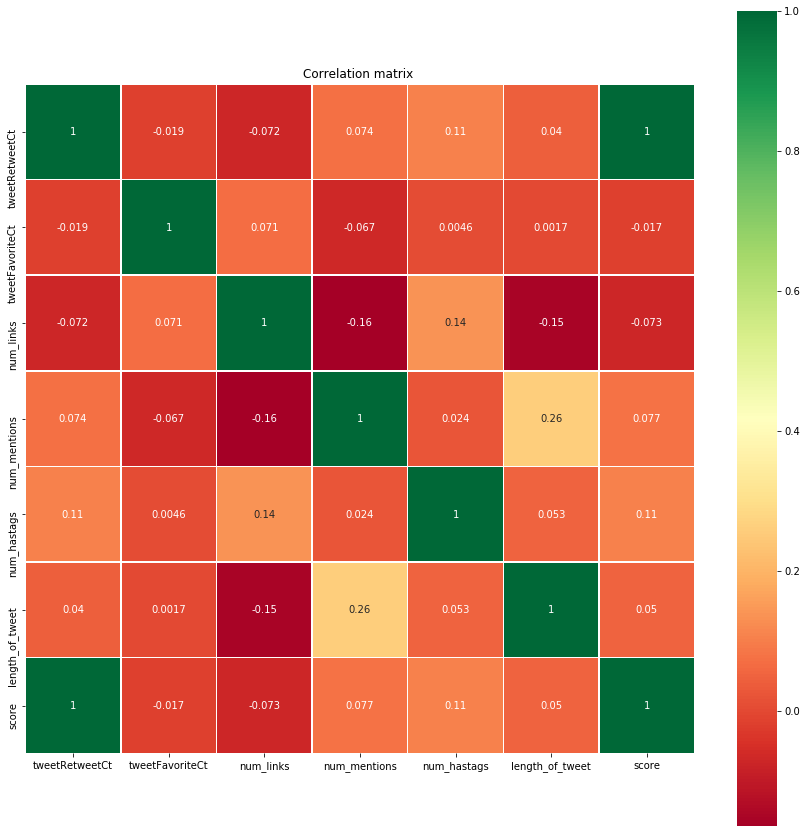

In [41]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['tweetRetweetCt','tweetFavoriteCt','num_links','num_mentions','num_hastags','length_of_tweet','score']].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

#### From above correlation Plot we can see that 'tweetFavoriteCt', 'userFollowerCt' are correlated with 'score'

#### Let's drop all the features which were used to create 'score' column

In [42]:
df.drop(df.columns.difference(['tweetText','score']), 1, inplace=True)

In [43]:
df.head()

,tweetText,score
0,RT @softwhoseok: me explaining to namjoon and ...,0.258948
1,RT @agustshoongi: Me before #BTSWORLD: any one...,0.443069
2,RT @guroderes: i drew my personal interpretati...,3.283926
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,0.337977
4,RT @sugasaward: Me chasing seokjin to audition...,1.100527


In [44]:
# create the nlp object using Spacy's English language class
nlp = English()

In [45]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized and lowercased    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words using stopword from spacy library and punctuations from string library
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [46]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [47]:
# bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
# Creating the Bag of Words model
bow_vector = CountVectorizer(max_features = 100,tokenizer = spacy_tokenizer,ngram_range=(4,5))

# Separating labels and features

In [48]:
X = df.drop('score',axis=1).values
y = df['score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
print(df.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(11610, 2) (11493, 1) (117, 1) (11493,) (117,)


In [337]:
# Xtrain = train.iloc[0:rows_train,1:]
# Xtest = train.iloc[rows_train:,1:]
# ytrain = train.iloc[0:rows_train,0]
# ytest = train.iloc[rows_train:,0]

In [49]:
X_train = X_train.ravel()

In [50]:
X_train.shape

(11493,)

In [51]:
X_test = X_test.ravel()

In [52]:
X_test.shape

(117,)

In [53]:
y_train.shape

(11493,)

In [54]:
X_train

array(["RT @GOT7Official: GOT7 2019 WORLD TOUR 'KEEP SPINNING' IN NEWARK\n\nGOT7 @TODAYshow\n\n#GOT7 #갓세븐\n#GOT7_SPINNINGTOP\n#GOT7_ECLIPSE\n#GOT7WORLDTOU…",
       'RT @CNN: "They\'re a bunch of fraidy cats inside the White House. There\'s a lot of people inside ... that think that it was wrong, but they\'…',
       'RT @mikasasageyo: "Thank you for making my dream come true. Thank you. I feel as though I’ve witnessed a miracle. I do not believe there is…',
       ...,
       'RT @FactsDevito: i for one think the new Cats movie looks fantastic https://t.co/Nk0pJOSW6K',
       'Next: M Santner\nPAK 89/2 21.1 Ov\nNZ 237/6 50.0 Ov\nB Azam 36(44), M Hafeez 24(44)\n149 runs required from 173 balls… https://t.co/txa53Y8PUG',
       'Tribute to Shaheed #mangalpandey ji on his birth anniversary.\n\n#SecretOfHappyLife #FridayFeeling https://t.co/zGSIaB8D9l'],
      dtype=object)

In [55]:
# Let's use xgboost regressor as model to train
xgboost = XGBRegressor()

In [56]:
# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('tfidf',TfidfTransformer()),
                 ('regressor', xgboost)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x0000023B309CA710>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
       ...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [57]:
pred = pipe.predict(X_test)

#### Retweet the tweets using a new account

In [ ]:
## Connect Twitter

consumer_key = "mw2SbMaCkFvOqZ8ZJQdpiXIQg"
consumer_secret = "rC1UdwhVnYdkZmbr1yWeH9zpwbGMtziYSXlGurV9d0WloDARxc"
access_key = "1140264743501832192-LrfsROb3fxzogCWEOsgJfMQPX9fFX5"
access_secret = "U12yKaeKK86739s0rDx4bG7b3dcUXcL56IcQ12SlzXxvT"
#Establish connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [ ]:
import time
for row in row_num:
    tweetid = dataset.iloc[row,1]
    print(tweetid)  
    